 Business Analysis Using Retail Sales Data (Superstore)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Global_Superstore2.csv", encoding_errors='ignore')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', dayfirst=True)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df.dropna(inplace=True)

In [8]:
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

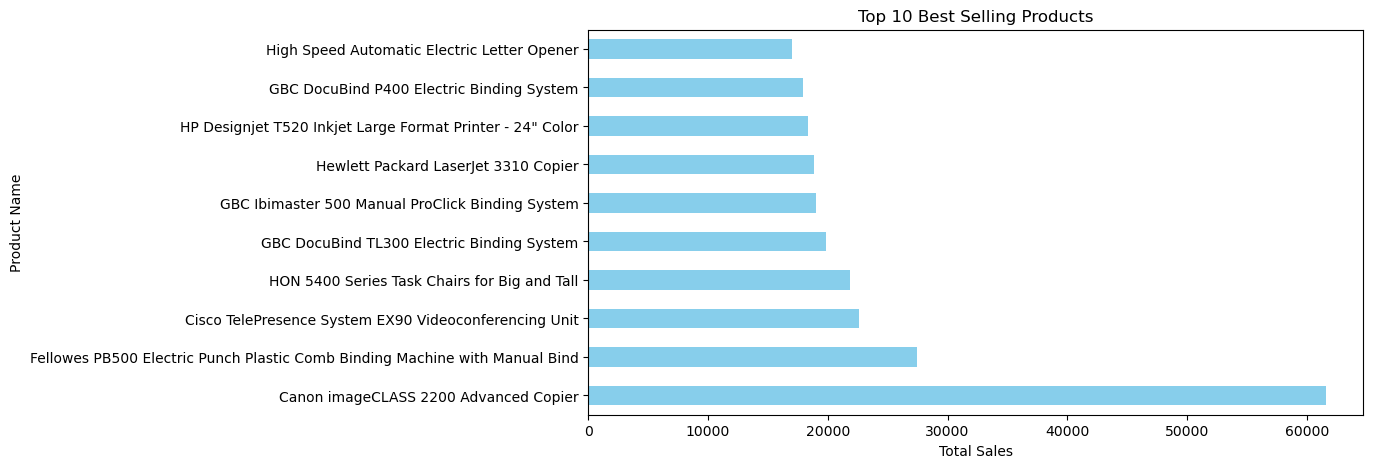

In [9]:
top_products = df.groupby('Product Name').agg({
    'Quantity': 'sum', 'Profit': 'sum', 'Sales': 'sum'}).sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products['Sales'].plot(kind='barh', color='skyblue')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Total Sales')
plt.show()

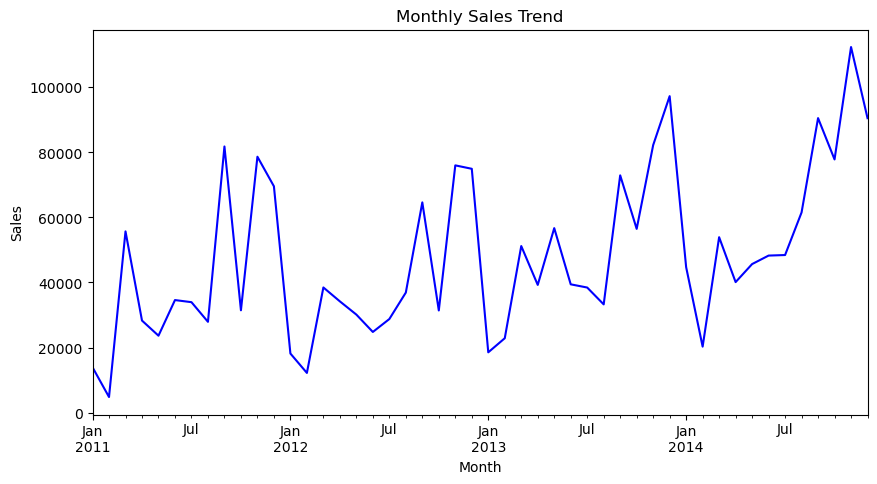

In [20]:
df['Month'] = df['Order Date'].dt.to_period("M")
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.plot(figsize=(10,5), title="Monthly Sales Trend", color='blue')
plt.ylabel("Sales")
plt.show()

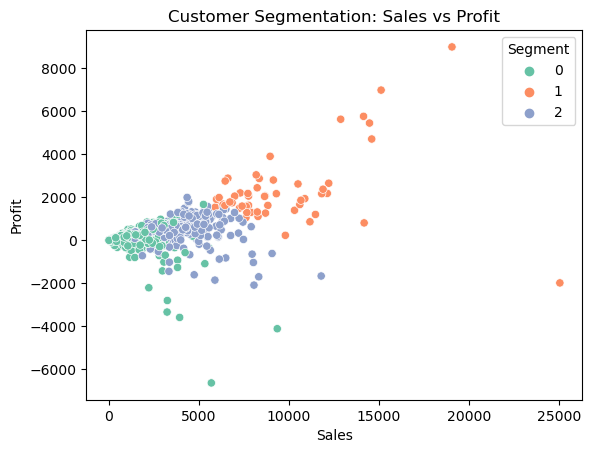

In [12]:
customer_df = df.groupby('Customer ID').agg({
    'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'}).reset_index()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[['Sales', 'Quantity', 'Profit']])
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Segment'] = kmeans.fit_predict(scaled_features)
sns.scatterplot(data=customer_df, x='Sales', y='Profit', hue='Segment', palette='Set2')
plt.title('Customer Segmentation: Sales vs Profit')
plt.show()

In [14]:
X = df[['Discount']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)
print("Regression Formula: Sales =", model.intercept_, "+", model.coef_[0], "* Discount")

Regression Formula: Sales = 243.1510751119755 + -85.10142552260504 * Discount


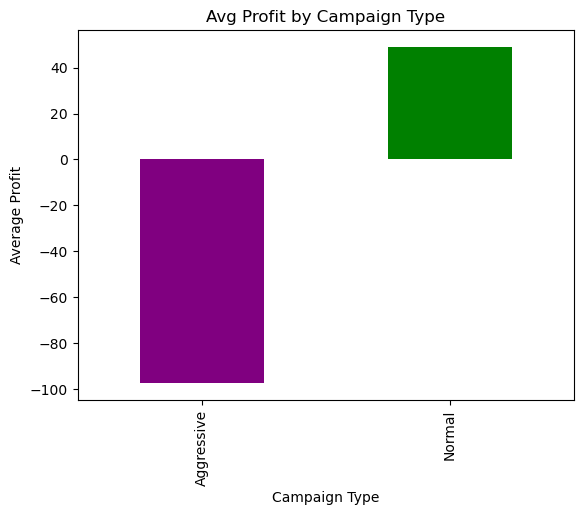

In [15]:
df['Campaign Type'] = np.where(df['Discount'] > 0.2, 'Aggressive', 'Normal')
campaign_effect = df.groupby('Campaign Type')['Profit'].mean()
campaign_effect.plot(kind='bar', color=['purple', 'green'], title='Avg Profit by Campaign Type')
plt.ylabel("Average Profit")
plt.show()

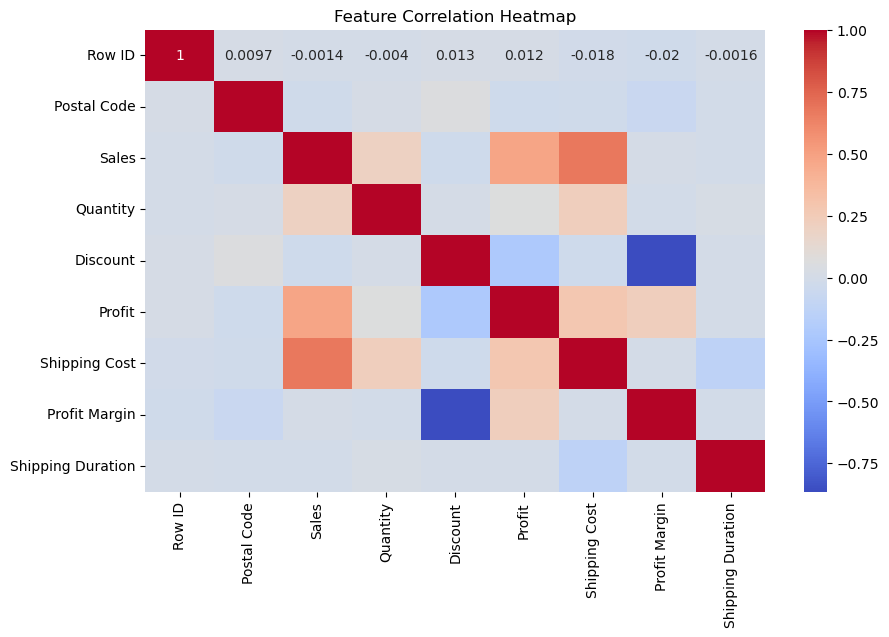

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
print("\n✅ Project Complete: Visuals, Clustering, Trend & Pricing Analysis Done!")


✅ Project Complete: Visuals, Clustering, Trend & Pricing Analysis Done!
